In [16]:
# 시퀀스 데이터 준비
# 순환 신경망은 주로 자연어 처리에 많이 쓰이기 때문에 문장 학습 예제가 일반적이지만 본 강좌에서는 악보 학습을 해보겠습니다. 그 이유는
'''
 - 음계가 문장보다 더 코드화 하기 쉽고,
 - 시계열 자료이며,
 - 나온 결과를 악보로 볼 수 있으며,
 - 무엇보다 우리가 학습한 모델이 연주하는 곡을 들어볼 수 있기 때문입니다.
   일단 쉬운 악보인 ‘나비야’를 준비했습니다.

표 밑에 간단한 음표코드를 표시하였습니다. 알파벳은 음계를 나타내며, 숫자는 음의 길이를 나타냅니다.
 - c(도), d(레), e(미), f(파), g(솔), a(라), b(시)
 - 4(4분음표), 8(8분음표)
'''

'\n - 음계가 문장보다 더 코드화 하기 쉽고,\n - 시계열 자료이며,\n - 나온 결과를 악보로 볼 수 있으며,\n - 무엇보다 우리가 학습한 모델이 연주하는 곡을 들어볼 수 있기 때문입니다.\n   일단 쉬운 악보인 ‘나비야’를 준비했습니다.\n\n표 밑에 간단한 음표코드를 표시하였습니다. 알파벳은 음계를 나타내며, 숫자는 음의 길이를 나타냅니다.\n - c(도), d(레), e(미), f(파), g(솔), a(라), b(시)\n - 4(4분음표), 8(8분음표)\n'

In [0]:
'''
데이터셋 생성
먼저 두 마디만 살펴보겠습니다.

g8 e8 e4
f8 d8 d4
여기서 우리가 정의한 문제대로 4개 음표 입력으로 다음 출력 음표를 예측하려면, 아래와 같이 데이터셋을 구성합니다.

g8 e8 e4 f8 d8 : 1~4번째 음표, 5번째 음표(나 비 야 나 비)
e8 e4 f8 d8 d4 : 2~5번째 음표, 6번째 음표(비 야 나 비 야)

1~4번째 열은 속성(feature)이고, 5번째 열은 클래스(class)를 나타냅니다. 
이렇게 4개씩 구간을 보는 것을 [윈도우 크기]가 4라고 합니다. 
그리고 문자와 숫자로 된 음표(코드)로는 모델 입출력으로 사용할 수 없기 때문에 
각 코드를 숫자로 변환할 수 있는 사전을 하나 만들어봅니다. 

첫번째 사전은 코드를 숫자로, 
두번째 사전은 숫자를 코드로 만드는 코드입니다.
(신경망에 들어갈 코드는 모두 숫자로 되어있어야 한다.)

g8 -> 숫자로 바꿔주는 사전이 필요하고,
숫자로 되어있는 것을 다시 코드(음계)로 바꿔줘야 한다.
'''
#나비야 나비야로 고정시켜놓은 사전
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [0]:
#이러한 사전을 이용해서 순차적인 음표를 우리가 지정한 윈도우 크기만큼 잘라 데이터셋을 생성하는 함수를 정의해보겠습니다.
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [19]:
# seq라는 변수에 “나비야” 곡 전체 음표를 저장한 다음, seq2dataset() 함수를 하여 dataset를 생성합니다.
# 데이터셋은 앞서 정의한 사전에 따라 숫자로 변환되어 생성됩니다.

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [20]:
#학습 과정
'''
“나비야”노래는 우리에게 너무나 익숙한 노래입니다. 
만약 옆사람이 “나비야~ 나”까지만 불러도 나머지를 이어서 다 부를 수 있을 정도로 말이죠. 
이렇게 첫 4개 음표를 입력하면 나머지를 연주할 수 있는 모델을 만드는 것이 목표입니다. 
우리가 정의한 문제를 풀기 위해 먼저 모델을 학습시켜야 합니다. 학습 시키는 방식은 아래와 같습니다.

파란색 박스가 입력값이고, 빨간색 박스가 우리가 원하는 출력값입니다.
1~4번째 음표를 데이터로 5번째 음표를 라벨값으로 학습을 시킵니다.
다음에는 2~5번째 음표를 데이터로 6번째 음표를 라벨값으로 학습을 시킵니다.
이후 한 음표씩 넘어가면서 노래 끝까지 학습시킵니다.
'''

#예측 과정
'''
예측은 두 가지 방법으로 해보겠습니다. 한 스텝 예측과 곡 전체 예측입니다.

한 스텝 예측
한 스텝 예측이란 실제 음표 4개를 입력하여 다음 음표 1개를 예측하는 것을 반복하는 것입니다. 
이 방법에서는 모델의 입력값으로는 항상 실제 음표가 들어갑니다.

모델에 t0, t1, t2, t3를 입력하면 y0 출력이 나옵니다.
모델에 t1, t2, t3, t4를 입력하면 y1 출력이 나옵니다.
모델에 t2, t3, t4, t5를 입력하면 y2 출력이 나옵니다.
이 과정을 y49 출력까지 반복합니다.
'''

#곡 전체 예측
'''
곡 전체 예측이란 입력된 초가 4개 음표만을 입력으로 곡 전체를 예측하는 것입니다. 
초반부가 지나면, 예측값만으로 모델에 입력되어 다음 예측값이 나오는 식입니다. 
그야말로 “나비야~ 나”까지 알려주면 나머지까지 모두 연주를 하는 것이죠. 
만약 중간에 틀린 부분이 생긴다면, 이후 음정, 박자는 모두 이상하게 될 가능성이 많습니다. 
예측 오류가 누적되는 것이겠죠.

모델에 t0, t1, t2, t3를 입력하면 y0 출력이 나옵니다.
예측값인 y0를 t4라고 가정하고, 모델에 t1, t2, t3, t4을 입력하면 y1 출력이 나옵니다.
예측값인 y1을 t5라고 가정하고, 모델에 t2, t3, t4(예측값), t5(예측값)을 입력하면 y2 출력이 나옵니다.
이 과정을 y49 출력까지 반복합니다.
'''

'\n곡 전체 예측이란 입력된 초가 4개 음표만을 입력으로 곡 전체를 예측하는 것입니다. \n초반부가 지나면, 예측값만으로 모델에 입력되어 다음 예측값이 나오는 식입니다. \n그야말로 “나비야~ 나”까지 알려주면 나머지까지 모두 연주를 하는 것이죠. \n만약 중간에 틀린 부분이 생긴다면, 이후 음정, 박자는 모두 이상하게 될 가능성이 많습니다. \n예측 오류가 누적되는 것이겠죠.\n\n모델에 t0, t1, t2, t3를 입력하면 y0 출력이 나옵니다.\n예측값인 y0를 t4라고 가정하고, 모델에 t1, t2, t3, t4을 입력하면 y1 출력이 나옵니다.\n예측값인 y1을 t5라고 가정하고, 모델에 t2, t3, t4(예측값), t5(예측값)을 입력하면 y2 출력이 나옵니다.\n이 과정을 y49 출력까지 반복합니다.\n'

In [29]:
#다층 퍼셉트론 모델
#앞서 생성한 데이터셋으로 먼저 다층 퍼셉트론 모델을 학습시켜보겠습니다. 
#Dense 레이어 3개로 구성하였고, 
#입력 속성이 4개이고 출력이 12개(one_hot_vec_size=12)으로 설정했습니다.
from keras.models import Sequential
from keras.layers import Dense
one_hot_vec_size = 12
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))
'''
“나비야” 악보를 이 모델을 학습할 경우 다음 그림과 같이 수행됩니다. 
4개의 음표를 입력으로 받고, 그 다음 음표가 라벨값으로 지정됩니다. 
이 과정을 곡이 마칠 때까지 반복하게 됩니다.
'''

'\n“나비야” 악보를 이 모델을 학습할 경우 다음 그림과 같이 수행됩니다. \n4개의 음표를 입력으로 받고, 그 다음 음표가 라벨값으로 지정됩니다. \n이 과정을 곡이 마칠 때까지 반복하게 됩니다.\n'

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]
one hot encoding vector size is  12
Epoch 1/2000
 - 0s - loss: 2.4439 - accuracy: 0.0400
Ep

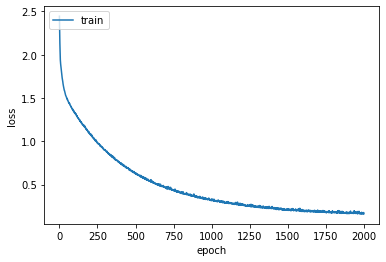

50/50 [==============================] - 0s 383us/step
accuracy: 92.00%
one step prediction :  [[2.50005213e-14 1.45678014e-33 3.00005035e-26 1.96707241e-14
  1.78067351e-19 4.67370879e-13 9.32826162e-16 3.99416523e-33
  9.79287863e-01 2.07122155e-02 5.28175388e-16 8.37033988e-19]
 [3.08059513e-14 9.97268736e-01 3.19813000e-04 1.79142354e-10
  1.69128114e-11 4.89820044e-14 2.43686771e-14 2.77925186e-32
  2.05144333e-05 2.39083939e-03 2.87129662e-08 5.50568063e-11]
 [9.68624620e-21 3.38304256e-25 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.51032990e-23 9.21213212e-20 9.99256313e-01
  1.03115985e-06 3.00115553e-05 7.12571840e-04 7.58131091e-19]
 [3.26031498e-12 1.37651914e-26 1.68414546e-22 1.38822744e-16
  4.19204156e-23 3.27826308e-11 8.47912032e-14 3.55877293e-22
  2.94348866e-01 7.05651164e-01 5.68476964e-17 6.06711090e-21]
 [1.21162178e-10 3.54697877e-05 1.38460587e-09 1.57579241e-04
  3.74035108e-11 2.88297025e-10 1.18357033e-10 8.14172888e-25
  1.05312862e-01 8.90796721e-01 7

In [37]:
'''다층 퍼셉트론 모델 전체 코드'''
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

'''----------------------- 데이터셋 만드는 부분 ------------------------------'''

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train) # 카테고리와 시켜준다.

one_hot_vec_size = y_train.shape[1]
#one hot encoding vector size is  12

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu')) # 128개 내보낸다.
model.add(Dense(128, activation='relu'))              # 128개 내보낸다.
model.add(Dense(one_hot_vec_size, activation='softmax')) # 12개 만큼 나간다

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init() # init() 초기함수 호출(우리가 만든 함수)

# 5. 모델 학습시키기
model.fit(x_train, # 문제 데이터
          y_train, # 정답 데이터
          epochs=2000, # 반복횟수
          batch_size=10, # 10 개씩 끊어서
          verbose=2, 
          callbacks=[history]) # 훈련 이력을 쌓아달라
# 한번 학습이 끝날 때 마다 원래 fit가 가지고 있는 history를 사용하는게 아닌, 우리가 만든 객체(history)를 callbacks 시킨다.

'''
Keras의 Model 이라는 패키지에서 제공하는 fit() 함수의 argument 중에 verbose가 있다.

verbose: Integer. 0, 1, or 2. 
Verbosity mode. 

0 = silent, 
1 = progress bar, 
2 = one line per epoch.
'''

# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#accuracy: 92.00%

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)
print("one step prediction : ", pred_out)
'''
one step prediction :  [[2.50005213e-14 1.45678014e-33 3.00005035e-26 1.96707241e-14
  1.78067351e-19 4.67370879e-13 9.32826162e-16 3.99416523e-33
  9.79287863e-01 2.07122155e-02 5.28175388e-16 8.37033988e-19]
 [3.08059513e-14 9.97268736e-01 3.19813000e-04 1.79142354e-10
  1.69128114e-11 4.89820044e-14 2.43686771e-14 2.77925186e-32
  2.05144333e-05 2.39083939e-03 2.87129662e-08 5.50568063e-11]
  ....
'''

# 예측 결과 값을 코드로 변환
for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)
'''
one step prediction :  
['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 
 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 
 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 
 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'd8', 'g8', 'e8', 'e4', 
 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
'''
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)
'''
full song prediction :  
 ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 
  'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 
  'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 
  'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 
  'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']
'''
'''
['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
'''

In [38]:
'''
한 스텝 예측 결과와 곡 전체 예측 결과를 악보로 그려보았습니다. 
이 중 틀린 부분을 빨간색 박스로 표시해봤습니다.
총 50개 예측 중 4개가 틀려서 92%의 정확도가 나왔습니다.
중간에 틀린 부분이 생기면 곡 전체를 예측하는 데 있어서는 그리 좋은 성능이 나오지 않습니다
'''

'\n한 스텝 예측 결과와 곡 전체 예측 결과를 악보로 그려보았습니다. \n이 중 틀린 부분을 빨간색 박스로 표시해봤습니다.\n총 50개 예측 중 4개가 틀려서 92%의 정확도가 나왔습니다.\n중간에 틀린 부분이 생기면 곡 전체를 예측하는 데 있어서는 그리 좋은 성능이 나오지 않습니다\n'

In [0]:
'''
상태유지 LSTM 모델
이번에는 상태유지(Stateful) LSTM 모델에 대해서 알아보겠습니다. 
여기서 상태유지라는 것은 현재 학습된 상태가 다음 학습 시 초기 상태로 전달된다는 것을 의미합니다.
--> 상태유지 모드에서는 현재 샘플의 학습 상태가 다음 샘플의 초기 상태로 전달된다.

긴 시퀀드 데이터를 처리할 때, 
LSTM 모델은 상태유지 모드에서 그 진가를 발휘합니다. 
(처음 학습한 내용중 자신이 기억해야 할 것은 기억하고, 버릴 것은 버려버린다.)


긴 시퀀스 데이터를 샘플 단위로 잘라서 학습하더라도 
LSTM 내부적으로 기억할 것은 기억하고 버릴 것은 버려서
기억해야할 중요한 정보만 이어갈 수 있도록 상태가 유지되기 때문입니다. 
(버릴건 버리기 때문에 학습상태 전체가 유지되기 힘들다.)

상태유지 LSTM 모델을 생성하기 위해서는 LSTM 레이어 생성 시,
                  ●stateful=True로 설정하면 됩니다. ●
또한 상태유지 모드에서는 입력형태를 
batch_input_shape = (배치사이즈, 타임스텝, 속성)으로 설정해야 합니다. 
상태유지 모드에서 배치사이즈 개념은 조금 어려우므로 다음 장에서 다루기로 하겠습니다.

model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))

상태유지 모드에서는 모델 학습 시에 상태 초기화에 대한 고민이 필요합니다. 
현재 샘플 학습 상태가 다음 샘플 학습의 초기상태로 전달되는 식인데, 
현재 샘플과 다음 샘플 간의 순차적인 관계가 없을 경우에는 
★상태가 유지되지 않고 초기화가 되어야 합니다. 다음 상황이 이러한 경우에 해당됩니다.

 - 마지막 샘플 학습이 마치고, 새로운 에포크 수행 시에는 
 - 새로운 샘플 학습을 해야하므로 상태 초기화 필요
 
 - 한 에포크 안에 여러 시퀀스 데이터 세트가 있을 경우, 
 - 새로운 시퀀스 데이터 세트를 학습 전에 상태 초기화 필요 

현재 코드에서는 한 곡을 가지고 계속 학습을 시키고 있으므로 
새로운 에포크 시작 시에만 상태 초기화를 수행하면 됩니다.

num_epochs = 2000

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False) # 50 is X.shape[0]
    model.reset_states()

아래 그림은 이 모델로 악보를 학습할 경우를 나타낸 것입니다. 
거의 기본 LSTM 모델과 동일하지만 학습된 
상태가 다음 샘플 학습 시에 초기 상태로 입력되는 것을 보실 수 있습니다.
'''

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 - 0s - loss: 3.9410e-04 - accuracy: 1.0000
epochs : 334
Epoch 1/1
 - 0s - loss: 3.8123e-04 - accuracy: 1.0000
epochs : 335
Epoch 1/1
 - 0s - loss: 3.6881e-04 - accuracy: 1.0000
epochs : 336
Epoch 1/1
 - 0s - loss: 3.5682e-04 - accuracy: 1.0000
epochs : 337
Epoch 1/1
 - 0s - loss: 3.4524e-04 - accuracy: 1.0000
epochs : 338
Epoch 1/1
 - 0s - loss: 3.3404e-04 - accuracy: 1.0000
epochs : 339
Epoch 1/1
 - 0s - loss: 3.2318e-04 - accuracy: 1.0000
epochs : 340
Epoch 1/1
 - 0s - loss: 3.1264e-04 - accuracy: 1.0000
epochs : 341
Epoch 1/1
 - 0s - loss: 3.0242e-04 - accuracy: 1.0000
epochs : 342
Epoch 1/1
 - 0s - loss: 2.9243e-04 - accuracy: 1.0000
epochs : 343
Epoch 1/1
 - 0s - loss: 2.8272e-04 - accuracy: 1.0000
epochs : 344
Epoch 1/1
 - 0s - loss: 2.7326e-04 - accuracy: 1.0000
epochs : 345
Epoch 1/1
 - 0s - loss: 2.6405e-04 - accuracy: 1.0000
epochs : 346
Epoch 1/1
 - 0s - loss: 2.5517e-04 - accuracy: 1.0000
epochs : 347
Epoch 1/1
 - 0s - loss: 2.4658e-04 -

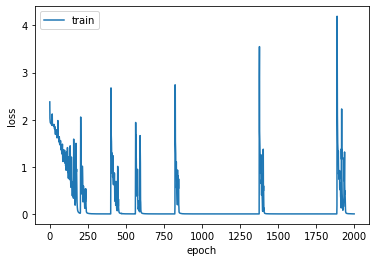

50/50 [==============================] - 0s 2ms/step
accuracy: 100.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [48]:
'''상태유지 LSTM 모델 전체 코드'''
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self): # init를 생성자로 만들고 싶다면 __init__ 로 만들어야 한다.
        self.losses = [] 

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)        

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True)) # 아까와 다른부분(상태 유지, 배치사이즈 별도로 정하기)
model.add(Dense(one_hot_vec_size, activation='softmax')) 
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init() # 히스토리를 초기화시켜준다.

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()

''' 기존코드
model.fit(x_train, # 문제 데이터
          y_train, # 정답 데이터
          epochs=2000, # 반복횟수
          batch_size=10, # 10 개씩 끊어서
          verbose=2, # 훈련 과정 보이게하기
          callbacks=[history]) # 훈련 이력을 쌓아달라
# 한번 학습이 끝날 때 마다 원래 fit가 가지고 있는 history를 사용하는게 아닌, 우리가 만든 객체(history)를 callbacks 시킨다.
'''

# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()#상태 초기화

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states() #상태 초기화
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()#상태 초기화

print("full song prediction : ", seq_out)

In [49]:
'''
one step prediction :  
['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 
 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8',
 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 
 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 
 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 
 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  
['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8',
 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 
 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 
 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 
 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 
 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
'''

"\none step prediction :  \n['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', \n 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8',\n 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', \n 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', \n 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', \n 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']\nfull song prediction :  \n['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8',\n 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', \n 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', \n 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', \n 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', \n 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']\n"

# 비행기 악보

In [74]:
'''
a12 g16 f8 g8 a8 a8 a4 g8 g8 g4 a8 a8 a4
a12 g16 f8 g8 a8 a8 a4 g8 g8 a12 g16 f2
'''

'\na12 g16 f8 g8 a8 a8 a4 g8 g8 g4 a8 a8 a4\na12 g16 f8 g8 a8 a8 a4 g8 g8 a12 g16 f2\n'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 - 0s - loss: 0.4956 - accuracy: 0.9048
epochs : 334
Epoch 1/1
 - 0s - loss: 0.4546 - accuracy: 0.8571
epochs : 335
Epoch 1/1
 - 0s - loss: 0.4223 - accuracy: 0.8571
epochs : 336
Epoch 1/1
 - 0s - loss: 0.8004 - accuracy: 0.8095
epochs : 337
Epoch 1/1
 - 0s - loss: 0.4820 - accuracy: 0.8571
epochs : 338
Epoch 1/1
 - 0s - loss: 0.2837 - accuracy: 1.0000
epochs : 339
Epoch 1/1
 - 0s - loss: 0.1860 - accuracy: 1.0000
epochs : 340
Epoch 1/1
 - 0s - loss: 0.1634 - accuracy: 1.0000
epochs : 341
Epoch 1/1
 - 0s - loss: 0.1193 - accuracy: 1.0000
epochs : 342
Epoch 1/1
 - 0s - loss: 0.1322 - accuracy: 1.0000
epochs : 343
Epoch 1/1
 - 0s - loss: 0.1433 - accuracy: 1.0000
epochs : 344
Epoch 1/1
 - 0s - loss: 0.1002 - accuracy: 1.0000
epochs : 345
Epoch 1/1
 - 0s - loss: 0.0709 - accuracy: 1.0000
epochs : 346
Epoch 1/1
 - 0s - loss: 0.0522 - accuracy: 1.0000
epochs : 347
Epoch 1/1
 - 0s - loss: 0.0434 - accuracy: 1.0000
epochs : 348
Epoch 1/1
 - 0s - loss: 0.039

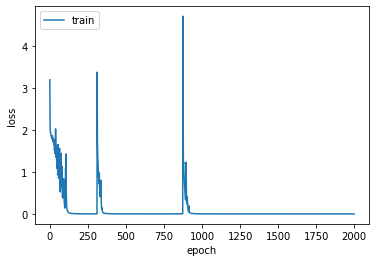

21/21 [==============================] - 0s 3ms/step
accuracy: 100.00%


In [75]:
'''비행기 상태유지 LSTM 모델 전체 코드'''
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self): # init를 생성자로 만들고 싶다면 __init__ 로 만들어야 한다.
        self.losses = [] 

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)        

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'f2':28,'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13,
            'c12':14, 'd12':15, 'e12':16, 'f12':17, 'g12':18, 'a12':19, 'b12':20,
            'c16':21, 'd16':22, 'e16':23, 'f16':24, 'g16':25, 'a16':26, 'b16':27}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8',
            14:'c12', 15:'d12', 16:'e12', 17:'f12', 18:'g12', 19:'a12', 20:'b12',
            21:'c16', 22:'d16', 23:'e16', 24:'f16', 25:'g16', 26:'a16', 27:'b16',28:'f2'}

# 시퀀스 데이터 정의

seq = ['a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'g4', 'a8', 'a8', 'a4',
      'a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'a12', 'g16', 'f2']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape) # (21, 5)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (21, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size) # 29

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True)) # 아까와 다른부분(상태 유지, 배치사이즈 별도로 정하기)
model.add(Dense(one_hot_vec_size, activation='softmax')) 

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init() # 히스토리를 초기화시켜준다.

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()



# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()#상태 초기화

# 8. 모델 사용하기

pred_count = 21 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['a12', 'g16', 'f8', 'g8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states() #상태 초기화


In [78]:
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['a12', 'g16', 'f8', 'g8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()#상태 초기화

print("full song prediction : ", seq_out)

'''
a12 g16 f8 g8 a8 a8 a4 g8 g8 g4 a8 a8 a4
a12 g16 f8 g8 a8 a8 a4 g8 g8 a12 g16 f2
'''

one step prediction :  ['a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'g4', 'a8', 'a8', 'a4', 'a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'a12', 'g16', 'f2']
full song prediction :  ['a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'g4', 'a8', 'a8', 'a4', 'a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'a12', 'g16', 'f2']


'\na12 g16 f8 g8 a8 a8 a4 g8 g8 g4 a8 a8 a4\na12 g16 f8 g8 a8 a8 a4 g8 g8 a12 g16 f2\n'